In [1]:
#!pip install -U aeon
#!pip install aeon[all_extras]
import warnings
import pandas as pd
import numpy as np
from aeon.datasets import load_airline
from aeon.forecasting.arima import ARIMA
from matplotlib import pyplot as plt
from aeon.forecasting.arima import AutoARIMA
from aeon.forecasting.sarimax import SARIMAX
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.seasonal import seasonal_decompose
from aeon.visualisation import plot_series
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from Statistics_and_Seq2Seq.all_functions import *
import os
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
def checkFolder(pasta, arquivo, tipo):
    if os.path.exists(pasta):
        caminho_arquivo = os.path.join(pasta, arquivo)
        if os.path.exists(caminho_arquivo):
            df = pd.read_csv(caminho_arquivo, sep=';')
            if 'DATA' in df.columns:
                if not tipo in df['DATA'].values:
                    print_log(f'Continuando... {tipo} em ${pasta}/{arquivo}".')
                    return True
    return False

dirs = [
    './datasets/venda/mensal/uf/gasolinac/',
    './datasets/venda/mensal/uf/etanolhidratado/',
    './datasets/venda/mensal/uf/gasolinadeaviacao/',
    './datasets/venda/mensal/uf/glp/',
    './datasets/venda/mensal/uf/oleocombustivel/',
    './datasets/venda/mensal/uf/oleodiesel/',
    './datasets/venda/mensal/uf/querosenedeaviacao/',
    './datasets/venda/mensal/uf/queroseneiluminante/',
]
results_file = './Statistics_and_Seq2Seq/results_arima_rolling'
transformations = ["normal", "deseasonal", "log", "deseasonal-diff", "deseasonal-log", "log-diff"]
for directory in dirs:
    for file in os.listdir(directory):
        if file.endswith('.csv'):
            for transform in transformations:
                uf = file.split("_")[1].upper()
                derivado = file.split("_")[2].split(".")[0]

                derivado_result = results_file+"/"+derivado
                exists = checkFolder(derivado_result, f"transform_{uf}.csv", transform)
                # if not exists:
                #     print(f"{derivado}/transform_{uf} nao existe")

Metrics

In [3]:
df = pd.read_csv("./datasets/venda/mensal/uf/gasolinac/mensal_am_gasolinac.csv", header=0, parse_dates=['timestamp'], sep=";", date_parser=custom_parser)
df['timestamp']=pd.to_datetime(df['timestamp'],infer_datetime_format=True)
df = df.set_index('timestamp',inplace=False)
df.index = df.index.to_period('M')
series = df['m3']
series

timestamp
1990-01     6767.468
1990-02    16605.555
1990-03     6930.072
1990-04     9990.788
1990-05     7492.369
             ...    
2023-10    52317.443
2023-11    49450.119
2023-12    51533.259
2024-01    50725.583
2024-02    44383.302
Freq: M, Name: m3, Length: 410, dtype: float64

In [4]:
from collections import Counter
import ast

def analyze_params(directory, transformation):
    p_counter = Counter()
    q_counter = Counter()

    files = [f for f in os.listdir(directory) if f.endswith('.csv')]
  
    for file in files:
        file_path = os.path.join(directory, file)
        df = pd.read_csv(file_path, sep=";")
        filtered_df = df[df['DATA'] == transformation]
        for params in filtered_df['PARAMS']:
            params_dict = ast.literal_eval(params)
            print(params_dict)
            p_counter[params_dict['p']] += 1
            q_counter[params_dict['q']] += 1

    most_common_p = p_counter.most_common(1)[0][0] if p_counter else None
    most_common_q = q_counter.most_common(1)[0][0] if q_counter else None

    return most_common_p, most_common_q


In [5]:
dr = './Statistics_and_Seq2Seq/results/sarima/rolling/gasolinac/'
ps, qs = analyze_params(dr, "deseasonal")
ps

{'p': 2, 'd': 1, 'q': 2, 's': 12}
{'p': 2, 'd': 1, 'q': 2, 's': 12}
{'p': 2, 'd': 1, 'q': 2, 's': 12}
{'p': 2, 'd': 1, 'q': 2, 's': 12}
{'p': 2, 'd': 1, 'q': 2, 's': 12}
{'p': 2, 'd': 1, 'q': 2, 's': 12}
{'p': 2, 'd': 1, 'q': 2, 's': 12}
{'p': 2, 'd': 1, 'q': 2, 's': 12}
{'p': 2, 'd': 1, 'q': 2, 's': 12}
{'p': 2, 'd': 1, 'q': 2, 's': 12}
{'p': 2, 'd': 1, 'q': 2, 's': 12}
{'p': 2, 'd': 1, 'q': 2, 's': 12}
{'p': 2, 'd': 1, 'q': 2, 's': 12}
{'p': 2, 'd': 1, 'q': 2, 's': 12}
{'p': 2, 'd': 1, 'q': 2, 's': 12}
{'p': 2, 'd': 1, 'q': 2, 's': 12}
{'p': 2, 'd': 1, 'q': 2, 's': 12}
{'p': 2, 'd': 1, 'q': 2, 's': 12}
{'p': 2, 'd': 1, 'q': 2, 's': 12}
{'p': 2, 'd': 1, 'q': 2, 's': 12}
{'p': 2, 'd': 1, 'q': 2, 's': 12}
{'p': 2, 'd': 1, 'q': 2, 's': 12}
{'p': 2, 'd': 1, 'q': 2, 's': 12}
{'p': 2, 'd': 1, 'q': 2, 's': 12}
{'p': 2, 'd': 1, 'q': 2, 's': 12}
{'p': 2, 'd': 1, 'q': 2, 's': 12}
{'p': 2, 'd': 1, 'q': 2, 's': 12}


2

In [6]:
# # results_arima = find_best_parameter(train_val_ds_diff, test_val_norm, test_norm, format="diff")
# # initial_order = (results_arima['best_params']['p'], results_arima['best_params']['d'], results_arima['best_params']['q'])
# initial_order = (9,0,7)
# # forecast, preds_norm, final_order = fit_arima_train(train_norm, train_norm, initial_order, horizon, format="normal")
# train_tf_ds = transform_train(train_norm, format="deseasonal-diff")

# forecast, preds_norm, final_order = fit_arima_train(train_tf_ds, train_norm, initial_order, horizon, format='deseasonal-diff')

# preds_real = znorm_reverse(preds_norm, mean, std)

# rmse_result = rmse(test, preds_real)
# mape_result = mape(test, preds_real)
# pocid_result = pocid(test, preds_real)
# pbe_result = pbe(test, preds_real)
# mcpm_result = mcpm(rmse_result, mape_result, pocid_result)
# print_log('[RESULTADO EM TRAIN]')
# print_log(f'PARAMS: {str(initial_order)}')
# print_log(f'MCPM: {mcpm_result}')
# print_log(f'RMSE: {rmse_result}')
# print_log(f'MAPE: {mape_result}')
# print_log(f'POCID: {pocid_result}')
# print_log(f'PBE: {pbe_result}')

In [7]:
# plot_series(test, preds_real, labels=["Test", "preds"])

In [8]:
horizon = 12
df = pd.read_csv("./datasets/venda/mensal/uf/gasolinac/mensal_am_gasolinac.csv", header=0, parse_dates=['timestamp'], sep=";", date_parser=custom_parser)
df['timestamp']=pd.to_datetime(df['timestamp'],infer_datetime_format=True)
df = df.set_index('timestamp',inplace=False)
df.index = df.index.to_period('M')
series = df['m3']

train, test = train_test_stats(series, horizon)
train_val, test_val = train_test_stats(train, horizon)
# train_val_norm = znorm(train_val)
# train_norm = znorm(train)
train_val_norm, _, _ = rolling_window_series(train_val, horizon)
train_norm, mean, std = rolling_window_series(train, horizon)

# test_val_norm = znorm_by(test_val, train_val)
# test_norm = znorm_by(test, train)


#series sem sazonalidade
train_val_ds = transform_train(train_val_norm, format="deseasonal")
train_tf_ds = transform_train(train_norm, format="deseasonal")

#series deseasonal + log transform
train_val_ds_log = transform_train(train_val_norm, format="deseasonal-log")
train_tf_ds_log = transform_train(train_norm, format="deseasonal-log")

#series sem sazonalidade e sem tendencia
train_val_ds_diff = transform_train(train_val_norm, format="deseasonal-diff")
train_tf_ds_diff = transform_train(train_norm, format="deseasonal-diff")


In [9]:
train_tf = transform_train(train_norm, format="deseasonal")
forecast = ARIMA(order=(11, 1, 5), 
                    suppress_warnings=True,
                    )
forecast.fit(train_tf)
preds2 = forecast.predict(fh=[i for i in range(1, horizon+1)] )
preds_norm2 = transform_reverse_preds(preds2, train_norm, format='deseasonal')

_, mean2, std2 = rolling_window_series(train, 12)

preds_real2 = znorm_reverse(preds_norm2, mean2, std2)

rmse_result = rmse(test, preds_real2)
mape_result = mape(test, preds_real2)
pocid_result = pocid(test, preds_real2)
mcpm_result = mcpm(rmse_result, mape_result, pocid_result)
pbe_result = abs(pbe(test, preds_real2))
mape_result


0.05728868545824739

In [10]:
train_tf = transform_train(train, format="deseasonal")
train_tf_norm, mean, std = rolling_window_series(train_tf, 12)

forecast = ARIMA(order=(11, 1, 5), 
                    suppress_warnings=True,
                    )
forecast.fit(train_tf_norm)
preds3 = forecast.predict(fh=[i for i in range(1, horizon+1)] )
preds3_real = reverse_transform_norm_preds(preds3, train, format="deseasonal")
rmse_result = rmse(test, preds3_real)
mape_result = mape(test, preds3_real)
pocid_result = pocid(test, preds3_real)
mcpm_result = mcpm(rmse_result, mape_result, pocid_result)
pbe_result = abs(pbe(test, preds3_real))
mape_result

0.05749290282365349

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='m3'>)

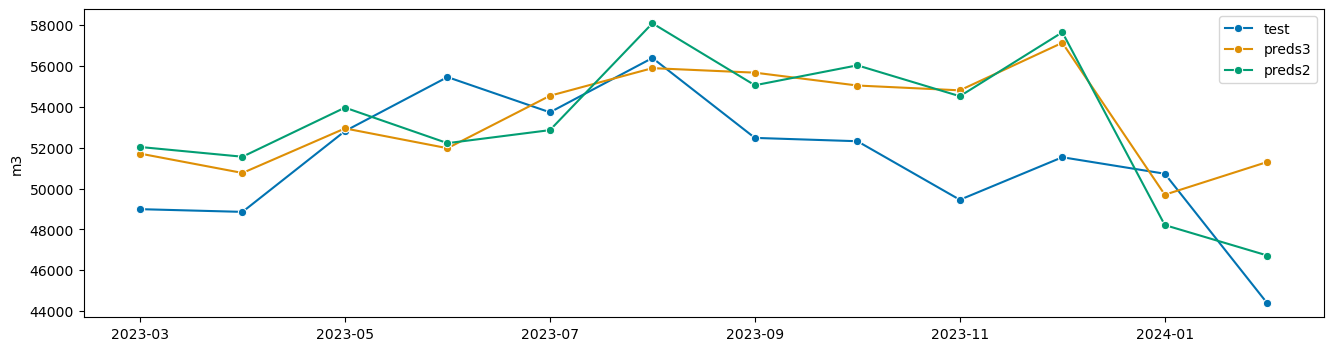

In [11]:
plot_series(test, preds3_real, preds_real2, labels=["test","preds3", "preds2"])